# Re-Index_Lead_Coordinates

Routine that reads in unevenly spaced lead coordinates output from active contour model. Re-index leads to desired geodesic spacing

## import packages

In [1]:
# math
import numpy as np, numpy.ma as ma
import math
import scipy
import pandas as pd

# plotting
import matplotlib as mpl
from matplotlib import pyplot as plt
import matplotlib.colors, matplotlib.cm as cm, cmocean
import cartopy, cartopy.crs as ccrs

# geographic, temporal calculations
from pyproj import CRS

# navigating local files
import sys, os, glob

# import my own functions from within scripts folder 
#********************************************************
sys.path.append('./scripts/')
from LIB_lead_geom import make_SpacedArray
#********************************************************

# set input/output parameters

In [2]:
# path to search for raw csv files
#=====================================================
csv_filepath = './example/'#'/Users/mackenziejewell/Desktop/lead_coordinates/'
#=====================================================

# path to save new txt files
#=====================================================
save_filepath = './example/'#'/Users/mackenziejewell/Desktop/lead_coordinates_2/'
#=====================================================

# naming convention for new txt files
# {} will be replaced with lead date from
# existing txt file names
#=====================================================
SaveName = 'Lead_{}_5km.csv'
#=====================================================

# grab list of csv files in txt_filepath and print
csv_list = sorted(list(glob.glob1(csv_filepath, "*_raw.csv")));
print(f'Searching in {csv_filepath}\n')
print(f'>>> {len(csv_list)} csv file{(len(csv_list)>1)*"s"} found')
print(f'>>> file{(len(csv_list)>1)*"s"} will be saved in {save_filepath}')

Searching in ./example/

>>> 1 csv file found
>>> file will be saved in ./example/


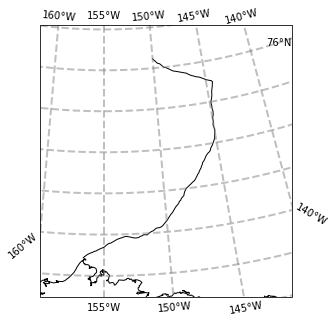

>>> save as ./example/Lead_raw_5km.csv


In [3]:
for II in range(len(csv_list)):

    # import raw lead coordinates
    #----------------------------
    import_coords = pd.read_csv(csv_filepath+csv_list[II])
    
    # interpolate points along lead at 1+/-0.1 km steps
    #--------------------------------------------------
    LatArray, LonArray = make_SpacedArray(import_coords.values, step_km=5, error_km=0.5, 
                                          PROJ = CRS.from_epsg(4326), show_plot = False)

    # plot interpolated points
    #-------------------------
    map_projection = ccrs.NorthPolarStereo(central_longitude=205)
    lon_range = [LonArray.min()-3, LonArray.max()+3]   # specify lon range to plot
    lat_range = [LatArray.min()-1, LatArray.max()+0.5]   # specify lat range to plot
    extent = [lon_range[0], lon_range[1], lat_range[0], lat_range[1]]
    fig, ax = plt.subplots(subplot_kw=dict(projection=map_projection), figsize=(20,5));
    ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                 linewidth=2, color='gray', alpha=0.5, linestyle='--')
    ax.set_extent(extent, crs=ccrs.PlateCarree())
    ax.plot(LonArray, LatArray, 'k-', lw=1, transform = ccrs.PlateCarree(), zorder=1)
    ax.coastlines();
    plt.show()
    
    # save new file
    #--------------
    # create data frame
    df = pd.DataFrame({'latitude': LatArray,'longitude': LonArray})
    # save data frame
    lead_date = csv_list[II].split('_')[-1][:-4]
    Altered_SaveName = save_filepath+SaveName.format(lead_date)
    print('>>> save as {}'.format(Altered_SaveName))
    df.to_csv(Altered_SaveName, index=False)

    fig.clear()


# convert csv naming list of txt files to list of csv files

In [31]:
# df_o = pd.read_csv('/Volumes/Jewell_EasyStore/PointBarrowLead_data/Lead_Coordinates_1km/PtBarrowLeads_JanApr20002020.csv')

# # grab names of txt files
# lead_txt_list = list(df_o.txt_list.values)
# # convert txt files to name of csv files
# lead_csv_list = [f"lead_{txt.split('_')[1]}.csv" for txt in lead_txt_list]

# df_n = pd.DataFrame({'date': df_o.date,
#                      'csv_list': lead_csv_list,
#                      'wind_group': df_o.wind_group})


# df_n.to_csv('/Volumes/Jewell_EasyStore/PointBarrowLead_data/Lead_Coordinates_5km/PtBarrowLeads_JanApr20002020.csv', index=False)
